This notebook is to compare the calculations in the radpatterns python codes 
with those of Kwiatek's Matlab calculations:

Grzegorz Kwiatek (2025). Radiation pattern from shear-tensile seismic source (https://www.mathworks.com/matlabcentral/fileexchange/43524-radiation-pattern-from-shear-tensile-seismic-source), MATLAB Central File Exchange. Retrieved July 16, 2025.

In [2]:
import numpy as np
import radpatterns
import matplotlib.pyplot as plt
from matplotlib import gridspec

#### Read radiation coefficients from Kwiatek's Matlab code

For this comparison, we have calculated the radiation patterns for a variety of sources using Kwiatek's code and saved them to a text file.  These examples include a range of strike, dips, rakes, takeoff angles, azimuths, and opening angles.  They do all use a Poisson's ratio of 0.25.

In [3]:
# read a file 
fname='Kwiatek_radiation_coefficients.txt'
hdr=np.loadtxt(fname,dtype=str,delimiter=',',max_rows=1)
vls=np.loadtxt(fname,dtype=float,delimiter=',',skiprows=1)

In [4]:
# extract the values of interest
kdct={}
for k in range(0,len(hdr)):
    kdct[str(hdr[k])]=vls[:,k]

# how many realizations
N=len(kdct['Gp'])

print('Available parameters: ',kdct.keys())

Available parameters:  dict_keys(['takeoff_angle', 'azimuth', 'strike', 'dip', 'rake', 'poissons_ratio', 'opening_angle', 'Gp', 'Gs', 'Gsh', 'Gsv'])


#### Calculate radiation coefficients with this code

In [5]:
# to be saved in a new dictionary
ndct={}
for ky in ['Gp','Gs','Gsh','Gsv']:
    ndct[ky]=np.ndarray(N,dtype=float)

In [6]:
# loop through each
for k in range(0,N):
    # create a moment tensor
    M=radpatterns.create_moment_tensor(rake=kdct['rake'][k],strike=kdct['strike'][k],
                                dip=kdct['dip'][k],opening_angle=kdct['opening_angle'][k])

    # and compute radiation coefficients
    ndct['Gp'][k],ndct['Gsh'][k],ndct['Gsv'][k]=\
        radpatterns.calc_radiation_pattern(M,kdct['takeoff_angle'][k],kdct['azimuth'][k])

# and compute total S coefficient
ndct['Gs']=np.power(np.power(ndct['Gsh'],2)+np.power(ndct['Gsv'],2),0.5)

#### And compare

In [7]:
# compute the max differences
print('Largest differences are \n');
for ky in ['Gp','Gs','Gsh','Gsv']:
    df=kdct[ky]-ndct[ky]
    df=np.max(np.abs(df))
    print('For {:3s}: {:0.5f}'.format(ky,df));

Largest differences are 

For Gp : 0.00190
For Gs : 0.00107
For Gsh: 0.00104
For Gsv: 0.00144


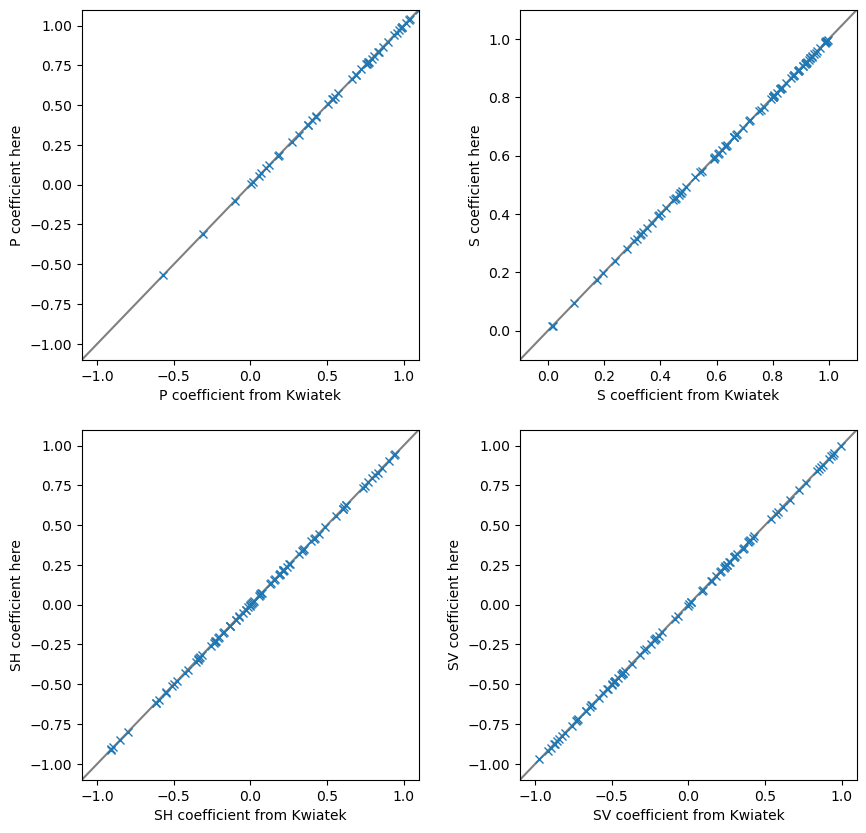

In [8]:
f=plt.figure(figsize=(10,10))
grd = gridspec.GridSpec(ncols=2, nrows=2, figure=f)
grd.update(wspace=0.3);

pp=f.add_subplot(grd[0, 0])
plt.plot(kdct['Gp'],ndct['Gp'],marker='x',linestyle='none');
pp.set_xlabel('P coefficient from Kwiatek');
pp.set_ylabel('P coefficient here');

ps=f.add_subplot(grd[0, 1])
plt.plot(kdct['Gs'],ndct['Gs'],marker='x',linestyle='none');
ps.set_xlabel('S coefficient from Kwiatek');
ps.set_ylabel('S coefficient here');

psh=f.add_subplot(grd[1, 0])
plt.plot(kdct['Gsh'],ndct['Gsh'],marker='x',linestyle='none');
psh.set_xlabel('SH coefficient from Kwiatek');
psh.set_ylabel('SH coefficient here');

psv=f.add_subplot(grd[1, 1])
plt.plot(kdct['Gsv'],ndct['Gsv'],marker='x',linestyle='none');
psv.set_xlabel('SV coefficient from Kwiatek');
psv.set_ylabel('SV coefficient here');

p=[pp,ps,psh,psv]
for ph in p:
    ph.plot([-2,2],[-2,2],linestyle='-',zorder=0,color='gray');
    ph.set_xlim([-1.1,1.1]);
    ph.set_ylim([-1.1,1.1]);
ps.set_xlim([-0.1,1.1]);
ps.set_ylim([-0.1,1.1]);